In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import (accuracy_score, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, median_absolute_error)
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,
                                     cross_val_score)
from sklearn.ensemble import (BaggingClassifier, BaggingRegressor,
                              RandomForestClassifier, RandomForestRegressor)
from sklearn.model_selection import StratifiedKFold, train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [12]:
def get_data_split():
    df_reg = pd.read_csv("observation_202403041348.csv")

    df_reg["month"] = df_reg["month"].astype("object")
    df_reg["day_of_month"] = df_reg["day_of_month"].astype("object")
    df_reg["day_of_week"] = df_reg["day_of_week"].astype("object")
    df_reg["service_id"] = df_reg["service_id"].astype("object")
    df_reg["service_operators_set"] = df_reg["service_operators_set"].astype("object")
    df_reg["is_urgent"] = df_reg["is_urgent"].astype("object")
    df_reg["weather_type"] = df_reg["weather_type"].astype("object")
    
    df_reg = df_reg[df_reg["operators_avg_service_time_last_month"] > 0]
    df_reg = df_reg[df_reg["operators_avg_service_time_last_hour"] > 0]
    #df_reg = df_reg[df_reg["wait_duration"] > 0]
    
    y = df_reg["wait_duration"]
    df_reg.drop(["wait_duration", "wait_duration_class_1", "wait_duration_class_2", "id"], axis=1, inplace=True)
    
    return train_test_split(
        df_reg.values, y, test_size=0.3, random_state=17, shuffle=True
    )

def print_statistics_by_group(X_holdout, y_holdout, regressor, regressorName):
    
    y_prediction = regressor.predict(X_holdout)

    mse = mean_squared_error(y_holdout, y_prediction)
    mape = mean_absolute_percentage_error(y_holdout, y_prediction)
    mae = mean_absolute_error(y_holdout, y_prediction)
    medae = median_absolute_error(y_holdout, y_prediction)
    
    print(f"{regressorName} MAE (Mean Absolute Error): {mae}")
    #print(f"{regressorName} MSE (Mean Squared Error): {mse}")
    print(f"{regressorName} MAPE (Mean Absolute Percentage Error): {mape}")
    print(f"{regressorName} MEDAE (Median Absolute Error): {medae}")    
    
    group_statistics = []
    minute = 0
    while minute < 90:
        group_indices = np.where((minute * 60 < y_holdout) & (y_holdout <= (minute + 1) * 60))[0]
        minute = minute + 1
        group_X_holdout = X_holdout[group_indices]
        group_y_holdout = y_holdout.array[group_indices]
        if group_X_holdout.shape[0] < 1:
            continue
        group_y_pred = regressor.predict(group_X_holdout)

        group_mse = mean_squared_error(group_y_holdout, group_y_pred)
        group_mape = mean_absolute_percentage_error(group_y_holdout, group_y_pred)
        group_mae = mean_absolute_error(group_y_holdout, group_y_pred)
        group_medae = median_absolute_error(group_y_holdout, group_y_pred)
        
        group_statistics.append((minute, group_mse, group_mape, group_mae, group_medae))
    
    print("Relative error value grouped by target value:")
    for minute, group_mse, group_mape, group_mae, group_medae in group_statistics:
        #print(f"Minute: {minute}, MSE: {group_mse}, MAPE: {group_mape}, MAE: {group_mae}, MedAE: {group_medae}")
        print(f"Minute: {minute}, MAPE: {group_mape}, MAE: {group_mae}, MedAE: {group_medae}")


In [8]:
X_train, X_holdout, y_train, y_holdout = get_data_split()

Random Forest MAE (Mean Absolute Error): 109.94490974858456
Random Forest MSE (Mean Squared Error): 111968.48299785865
Random Forest MAPE (Mean Absolute Percentage Error): 3725222469770304.5
Random Forest MEDAE (Median Absolute Error): 69.07500000000002


TypeError: missing a required argument: 'y_true'

In [ ]:
# Random Forest
random_forest_regressor = RandomForestRegressor().fit(X_train, y_train)

In [16]:
# XG Boost
xg_regressor = XGBRegressor().fit(X_train, y_train)

In [13]:
print_statistics_by_group(X_holdout, y_holdout, random_forest_regressor, "Random Forest")

Random Forest MAE (Mean Absolute Error): 109.94490974858456
Random Forest MAPE (Mean Absolute Percentage Error): 3725222469770304.5
Random Forest MEDAE (Median Absolute Error): 69.07500000000002
Relative error value grouped by target value:
Minute: 1, MAPE: 7.3177410953978, MAE: 68.4408009946973, MedAE: 46.474999999999994
Minute: 2, MAPE: 0.8728355729005718, MAE: 75.55176765204209, MedAE: 49.015
Minute: 3, MAPE: 0.63478998945686, MAE: 93.8456942912755, MedAE: 68.07
Minute: 4, MAPE: 0.47857627870284064, MAE: 99.90236364180895, MedAE: 79.855
Minute: 5, MAPE: 0.4081872429909522, MAE: 109.7142711148904, MedAE: 92.075
Minute: 6, MAPE: 0.3519604069435289, MAE: 115.7456026086877, MedAE: 93.38999999999999
Minute: 7, MAPE: 0.3114277832796348, MAE: 121.28346311729908, MedAE: 97.3825
Minute: 8, MAPE: 0.28751934440788246, MAE: 129.15801126017243, MedAE: 104.34500000000003
Minute: 9, MAPE: 0.27218040698592433, MAE: 138.4025891590679, MedAE: 119.94
Minute: 10, MAPE: 0.2561355328444737, MAE: 145.5904

In [17]:
print_statistics_by_group(X_holdout, y_holdout, xg_regressor, "XG Boost")

XG Boost MAE (Mean Absolute Error): 113.72456056331998
XG Boost MAPE (Mean Absolute Percentage Error): 4107739167109179.5
XG Boost MEDAE (Median Absolute Error): 72.01902770996094
Relative error value grouped by target value:
Minute: 1, MAPE: 7.254115343513071, MAE: 69.66377844514221, MedAE: 48.22535705566406
Minute: 2, MAPE: 0.8441516230870638, MAE: 73.09673391009315, MedAE: 49.999900817871094
Minute: 3, MAPE: 0.5724340148864464, MAE: 84.73777719155272, MedAE: 65.16132354736328
Minute: 4, MAPE: 0.4657377212547934, MAE: 97.25793021364032, MedAE: 78.49705505371094
Minute: 5, MAPE: 0.4087429760721466, MAE: 109.92492099307832, MedAE: 91.62965393066406
Minute: 6, MAPE: 0.3600822093545542, MAE: 118.50968210967262, MedAE: 102.50151062011719
Minute: 7, MAPE: 0.33232761681615947, MAE: 129.46692630765205, MedAE: 108.26834106445312
Minute: 8, MAPE: 0.3097394584565594, MAE: 139.2465128696913, MedAE: 120.09573364257812
Minute: 9, MAPE: 0.29959738530191876, MAE: 152.3279010152865, MedAE: 134.715454

In [26]:
xgb = XGBRegressor()

# Define the hyperparameters grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.03, 0.1, 0.3],
    'max_depth': [5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.0, 0.1, 0.2]
}

# Initialize GridSearchCV
#grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_percentage_error')


# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score (Negative MSE):", best_score)

# Make predictions on the testing data using the best estimator found
best_estimator = grid_search.best_estimator_

Best Parameters: {'gamma': 0.0, 'learning_rate': 0.03, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 50}
Best Score (Negative MSE): -2603991248132681.0


In [27]:
print_statistics_by_group(X_holdout, y_holdout, best_estimator, "XG Boost (GridSearchCV)")

XG Boost (GridSearchCV) MAE (Mean Absolute Error): 119.94750317316854
XG Boost (GridSearchCV) MAPE (Mean Absolute Percentage Error): 2929019553372411.0
XG Boost (GridSearchCV) MEDAE (Median Absolute Error): 62.96519088745117
Relative error value grouped by target value:
Minute: 1, MAPE: 5.4055967414104895, MAE: 46.911740697422154, MedAE: 34.12319755554199
Minute: 2, MAPE: 0.5877979545748045, MAE: 51.2736757244153, MedAE: 38.08273696899414
Minute: 3, MAPE: 0.45087097498882556, MAE: 66.69969522924718, MedAE: 56.115352630615234
Minute: 4, MAPE: 0.384188134075566, MAE: 80.45034044301735, MedAE: 71.07898712158203
Minute: 5, MAPE: 0.36267346087003693, MAE: 97.54871063868205, MedAE: 87.34322357177734
Minute: 6, MAPE: 0.35291522785822943, MAE: 116.19978491940535, MedAE: 107.08181762695312
Minute: 7, MAPE: 0.3508307664162735, MAE: 136.61918896457146, MedAE: 126.71923828125
Minute: 8, MAPE: 0.33522267233357755, MAE: 150.70624037805547, MedAE: 142.2083740234375
Minute: 9, MAPE: 0.3495312885878482

In [20]:
importances = random_forest_regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_regressor.estimators_], axis=0)

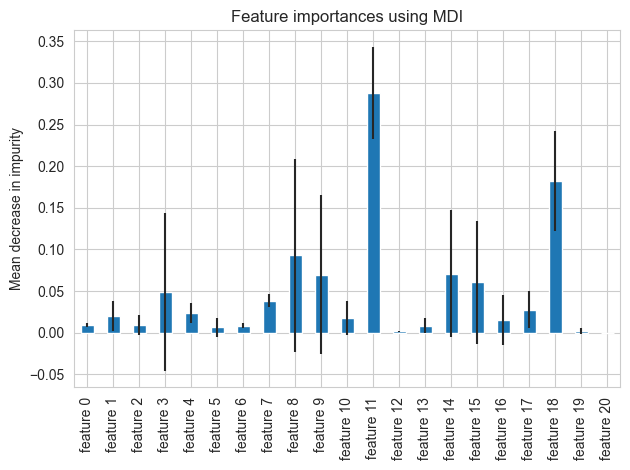

In [22]:
feature_names = [f"feature {i}" for i in range(X_holdout.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [25]:
df_reg = pd.read_csv("observation_202403041348.csv")

df_reg["month"] = df_reg["month"].astype("object")
df_reg["day_of_month"] = df_reg["day_of_month"].astype("object")
df_reg["day_of_week"] = df_reg["day_of_week"].astype("object")
df_reg["service_id"] = df_reg["service_id"].astype("object")
df_reg["service_operators_set"] = df_reg["service_operators_set"].astype("object")
df_reg["is_urgent"] = df_reg["is_urgent"].astype("object")
df_reg["weather_type"] = df_reg["weather_type"].astype("object")

df_reg = df_reg[df_reg["operators_avg_service_time_last_month"] > 0]
df_reg = df_reg[df_reg["operators_avg_service_time_last_hour"] > 0]
#df_reg = df_reg[df_reg["wait_duration"] > 0]

df_reg.drop(["wait_duration", "wait_duration_class_1", "wait_duration_class_2", "id"], axis=1, inplace=True)
df_reg.info()
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105618 entries, 12 to 169279
Data columns (total 21 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   month                                  105618 non-null  object 
 1   day_of_month                           105618 non-null  object 
 2   day_of_week                            105618 non-null  object 
 3   hour                                   105618 non-null  int64  
 4   minute                                 105618 non-null  int64  
 5   non_working_days_before                105618 non-null  int64  
 6   non_working_days_after                 105618 non-null  int64  
 7   service_id                             105618 non-null  object 
 8   minutes_from_opening                   105618 non-null  int64  
 9   minutes_to_closing                     105618 non-null  int64  
 10  queue_size_for_selected_service        105618 non-null 